# Import package and data set

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/Tugas Dibimbing/project day 20/

/content/gdrive/MyDrive/Tugas Dibimbing/project day 20


In [ ]:
import numpy as np
import pandas as pd

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#for jupoter notebook widgets
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

#for interactive shells
from IPython.display import display

#for supress warnings
import warnings
warnings.filterwarnings('ignore')

#setting up the chart size and background
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 6
rcParams['lines.linewidth'] = 3
plt.style.use('fivethirtyeight')




# Introduction
This data set contains data about each student's performance in math, reading and writing tests. the data set contains gender, race/ethnicity, the last education of each student's parents, students who have standard and free/reduced lunches, and information on test preparations carried out by each student.

In [ ]:
data = pd.read_csv('StudentsPerformance.csv')
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


# Quick Exploration and Data Understanding

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


based on data above, data not have missing value for each column

In [ ]:
cat = ['gender','race/ethnicity','parental level of education','lunch',
       'test preparation course']
num = ['math score','reading score', 'writing score']

In [ ]:
data[cat].describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [ ]:
data['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [ ]:
data[num].describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


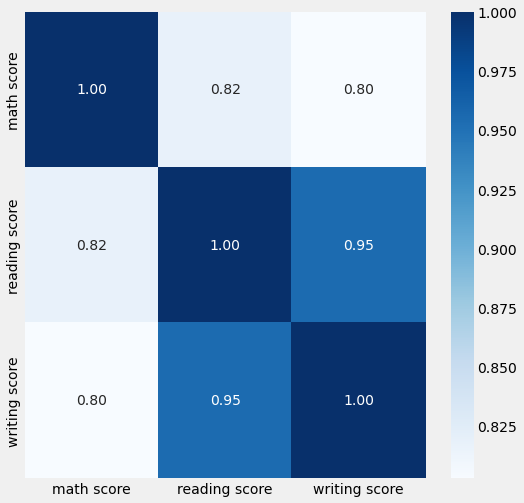

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), cmap='Blues', annot=True, fmt='.2f')

Based on information above, we get information :
1. The students with gender female have high frequently than male.
2. race/ethnicity have 5 unique value, that are **Group A,B,C,D and E** with group C have high frequently than the others.
3. parental level of education has 6 unique values, that are **some high school**, **high school**, **some college**, **bachelor's degree**, **associate's degree**, **master's college**.
4. lunch has two category, that is standard and free/reduced.
5. test preparation has two category, that is completed and none.
6. there is any student get score 0 for math category.
7. math score has positive correlation reading score and writing score.

# Exploration Data Analisys and Visualization

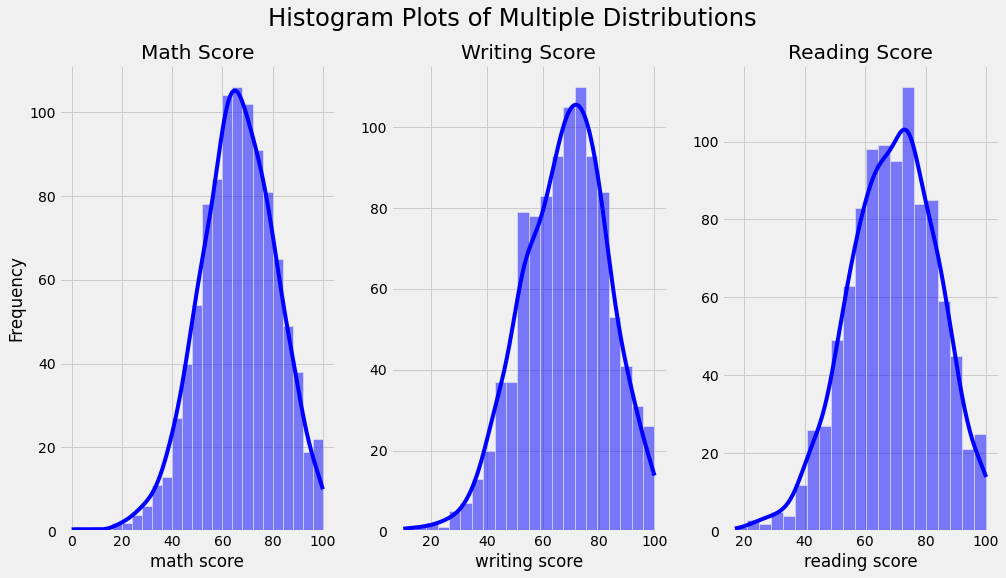

In [ ]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize = (15,8))
sns.histplot(data, x='math score',color = 'blue', kde =True, label = 'Distribution of Math score', ax = ax1)
sns.histplot(data, x='writing score',color = 'blue', kde = True,label = 'Distribution of Writing Score', ax = ax2)
sns.histplot(data, x='reading score',color = 'blue', kde= True,label = 'Distribution of Reading Score', ax = ax3)

# Set axis label
ax1.set_ylabel('Frequency')


ax2.set_ylabel('')
ax3.set_ylabel('')

# Set Title for each plots
ax1.set_title('Math Score')
ax2.set_title('Writing Score')
ax3.set_title('Reading Score')


fig.suptitle('Histogram Plots of Multiple Distributions', fontsize = 'xx-large')
plt.show()

for numerical data follows distribution normal, there is not have scew

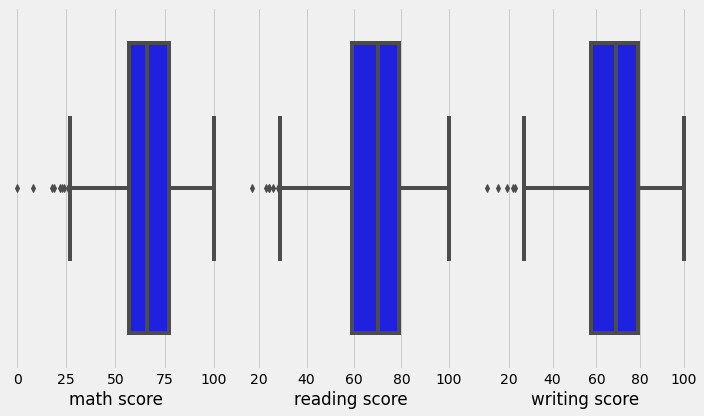

In [ ]:
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(data[num[i]], color='blue', orient='h')
    plt.tight_layout()

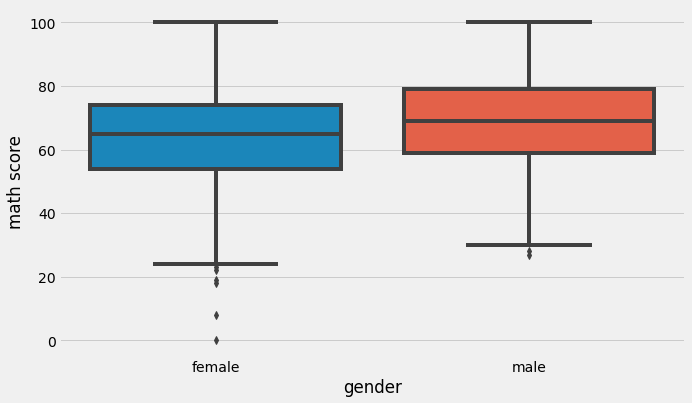

In [ ]:
sns.boxplot(data=data, x='gender', y='math score')

there are outliers both of female and male 

In [ ]:
# Getting values for each of the column

for col in data.columns:
    print(f"Column: {col}")
    print(data[col].value_counts())
    
    print("="*10)

Column: gender
female    518
male      482
Name: gender, dtype: int64
Column: race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64
Column: parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64
Column: lunch
standard        645
free/reduced    355
Name: lunch, dtype: int64
Column: test preparation course
none         642
completed    358
Name: test preparation course, dtype: int64
Column: math score
65    36
62    35
59    32
69    32
73    27
      ..
22     1
19     1
18     1
8      1
0      1
Name: math score, Length: 81, dtype: int64
Column: reading score
72    34
74    33
64    32
73    30
67    30
      ..
32     1
28     1
26     1
23     1
17     1
Name: reading score, Length: 72, dtype: int64
Column: writing score
74    35
70    33

Text(0.5, 1.0, 'Number of Female vs Male')

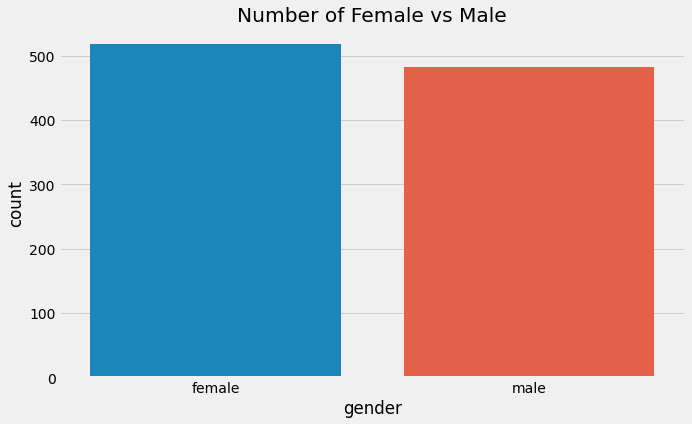

In [ ]:
ax = sns.countplot(x="gender", data=data)
plt.title('Number of Female vs Male')

Text(0.5, 1.0, 'Number of Group for every category in race/ethnicity')

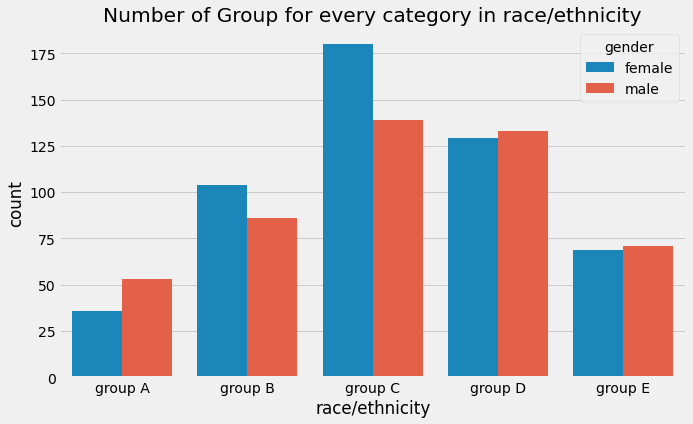

In [ ]:
ax = sns.countplot(x="race/ethnicity", hue='gender', data=data, order=['group A','group B','group C','group D','group E'])
plt.title('Number of Group for every category in race/ethnicity')

Text(0.5, 1.0, 'Count launch standard and free/reduced')

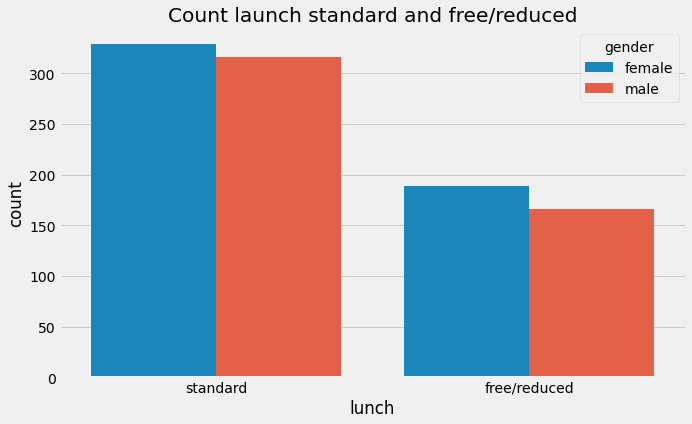

In [ ]:
ax = sns.countplot(x="lunch", hue='gender', data=data)
plt.title('Count launch standard and free/reduced')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

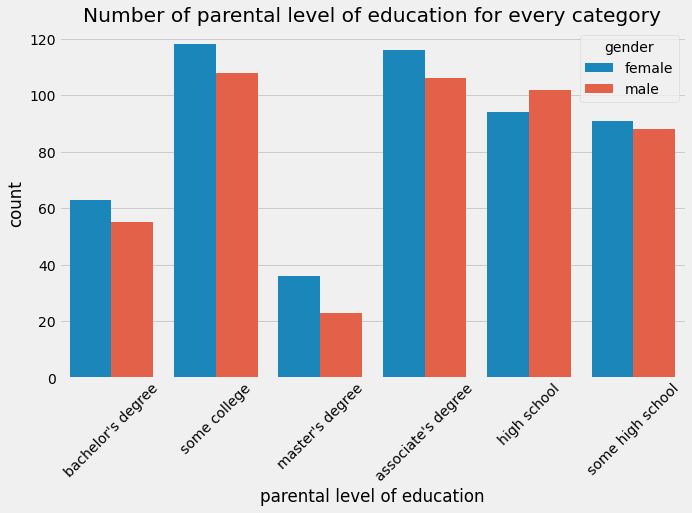

In [ ]:
ax = sns.countplot(x="parental level of education", hue = 'gender', data=data)
plt.title('Number of parental level of education for every category')
plt.xticks(rotation = 45)

Based on information above :

1. number of the female students is 518, while the male students is 482.
2. in the race/ethnicity column, group C has the highest number, followed by group D >B>E>A.
3.parents of students with the category "some college" are the most and have relatively the same number as "high school", while parents of students with master's degrees are the least, amounting to 59.
4. the students with standard lunch are the most than free/reduced.
5. many students who do not have test preparation compared to students who have completed test preparation.



,math score,writing score,reading score
,mean,mean,mean
gender,,,
female,63.633205,72.467181,72.608108
male,68.728216,63.311203,65.473029


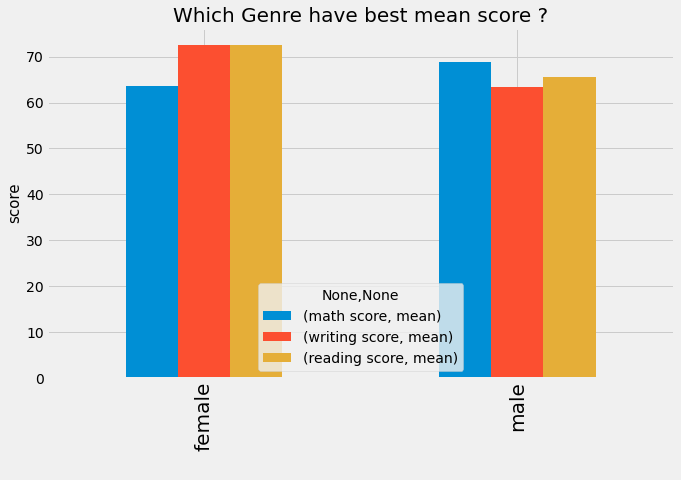

In [ ]:
display(data[['gender','math score','writing score','reading score']].groupby(['gender']).agg(['mean']).style.background_gradient(cmap = 'Wistia'))

data[['gender','math score','writing score','reading score']].groupby(['gender']).agg(['mean']).plot(kind = 'bar')
plt.title('Which Genre have best mean score ?', fontsize =20)
plt.xticks(rotation =90, fontsize =20)
plt.ylabel('score', fontsize =15)
plt.xlabel(' ',)
plt.show()

,math score,writing score,reading score
,mean,mean,mean
lunch,,,
free/reduced,58.921127,63.022535,64.653521
standard,70.034109,70.823256,71.654264


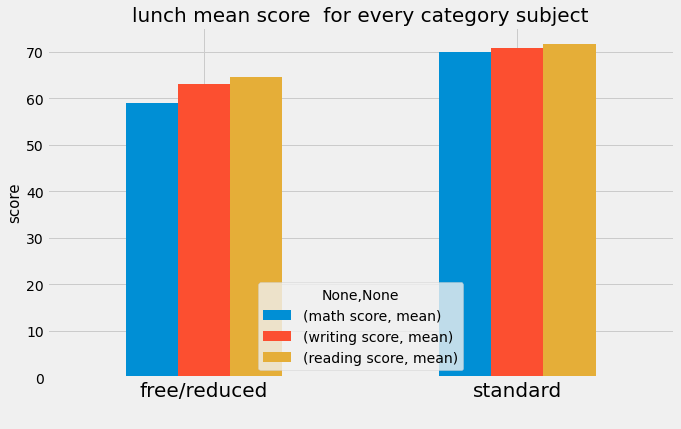

In [ ]:
display(data[['lunch','math score','writing score','reading score']].groupby(['lunch']).agg(['mean']).style.background_gradient(cmap = 'Wistia'))

data[['lunch','math score','writing score','reading score']].groupby(['lunch']).agg(['mean']).plot(kind = 'bar')
plt.title('lunch mean score  for every category subject', fontsize =20)
plt.xticks(rotation =0, fontsize =20)
plt.ylabel('score', fontsize =15)
plt.xlabel(' ',)
plt.show()

,math score,writing score,reading score
,mean,mean,mean
race/ethnicity,,,
group A,61.629213,62.674157,64.674157
group B,63.452632,65.600000,67.352632
group C,64.463950,67.827586,69.103448
group D,67.362595,70.145038,70.030534
group E,73.821429,71.407143,73.028571


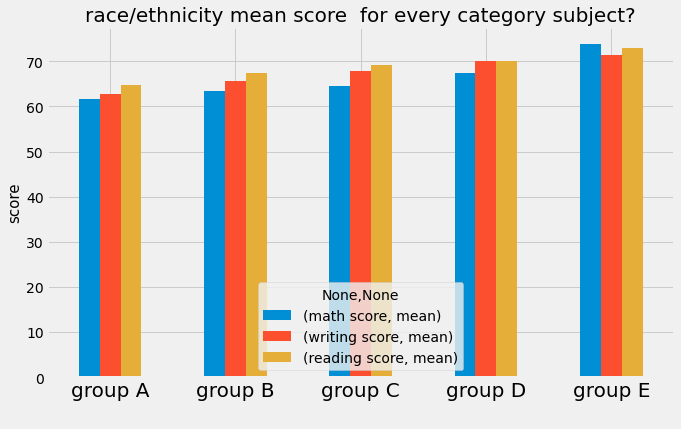

In [ ]:
display(data[['race/ethnicity','math score','writing score','reading score']].groupby(['race/ethnicity']).agg(['mean']).style.background_gradient(cmap = 'Wistia'))

data[['race/ethnicity','math score','writing score','reading score']].groupby(['race/ethnicity']).agg(['mean']).plot(kind = 'bar')
plt.title('race/ethnicity mean score  for every category subject?', fontsize =20)
plt.xticks(rotation =0, fontsize =20)
plt.ylabel('score', fontsize =15)
plt.xlabel(' ',)
plt.show()

,math score,writing score,reading score
,mean,mean,mean
parental level of education,,,
associate's degree,67.882883,69.896396,70.927928
bachelor's degree,69.389831,73.381356,73.000000
high school,62.137755,62.448980,64.704082
master's degree,69.745763,75.677966,75.372881
some college,67.128319,68.840708,69.460177
some high school,63.497207,64.888268,66.938547


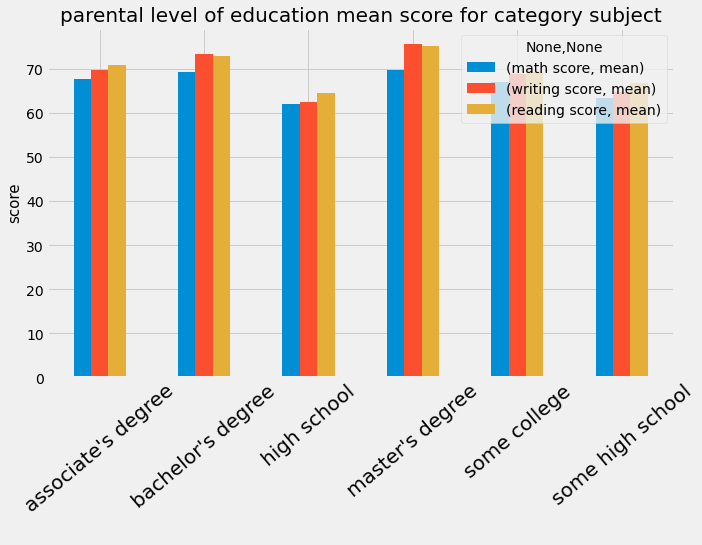

In [ ]:
display(data[['parental level of education','math score','writing score','reading score']].groupby(['parental level of education']).agg(['mean']).style.background_gradient(cmap = 'Wistia'))

data[['parental level of education','math score','writing score','reading score']].groupby(['parental level of education']).agg(['mean']).plot(kind = 'bar')
plt.title('parental level of education mean score for category subject', fontsize =20)
plt.xticks(rotation =40, fontsize =20)
plt.ylabel('score', fontsize =15)
plt.xlabel(' ',)
plt.show()

In [ ]:
#Create column for analyst more deeply

data['FinalScore'] = round(((data['math score']+data['writing score']+data['reading score'])/3),2)


In [ ]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,FinalScore
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


https://en.wikipedia.org/wiki/Academic_grading_in_Indonesia
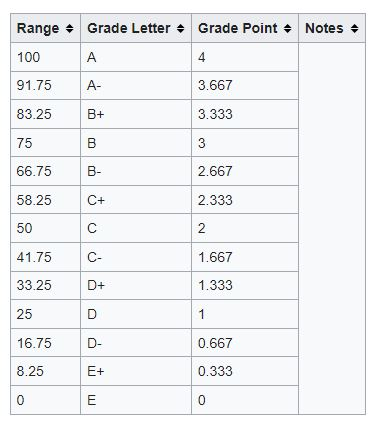

in here i will use Indonesian standard for judge some student pass the exam.
i will use role :
1. Grade A for final score => 90
2. Grade B for final score => 80 and <90
3. Grade C for final score =>60 and <80
4. Grade D for final score > 40 and <60
5. Grade E for final score <=40

In [ ]:
def grade(FinalScore):
    if (FinalScore>=90):
        return 'A'
    if (FinalScore >= 80):
        return 'B'
    if (FinalScore >= 60):
        return 'C'
    if (FinalScore >= 40):
        return 'D'
    else: 
        return 'E'
data['Grade']=data['FinalScore'].apply(grade)
data.Grade.value_counts()

C    517
D    255
B    146
A     52
E     30
Name: Grade, dtype: int64

In [ ]:
def Status(FinalScore):
    if(FinalScore >=40):
      return 'PASS'
    else:
      return 'FAIL'
data['Status']=data['FinalScore'].apply(Status)
data.Status.value_counts()

PASS    970
FAIL     30
Name: Status, dtype: int64

In [ ]:
display(data[['gender','race/ethnicity','parental level of education','lunch','test preparation course','FinalScore','Grade']].sort_values(by = 'FinalScore', ascending =False).head(10).style.background_gradient(cmap = 'spring'))

,gender,race/ethnicity,parental level of education,lunch,test preparation course,FinalScore,Grade
916,male,group E,bachelor's degree,standard,completed,100.000000,A
458,female,group E,bachelor's degree,standard,none,100.000000,A
962,female,group E,associate's degree,standard,none,100.000000,A
114,female,group E,bachelor's degree,standard,completed,99.670000,A
179,female,group D,some high school,standard,completed,99.000000,A
712,female,group D,some college,standard,none,99.000000,A
165,female,group C,bachelor's degree,standard,completed,98.670000,A
625,male,group D,some college,standard,completed,98.670000,A
903,female,group D,bachelor's degree,free/reduced,completed,97.670000,A
149,male,group E,associate's degree,free/reduced,completed,97.670000,A


In [ ]:
display(data[['gender','race/ethnicity','parental level of education','lunch','test preparation course','FinalScore','Grade']].sort_values(by = 'FinalScore', ascending =False).tail(10).style.background_gradient(cmap = 'spring'))

,gender,race/ethnicity,parental level of education,lunch,test preparation course,FinalScore,Grade
211,male,group C,some college,free/reduced,none,30.000000,E
338,female,group B,some high school,free/reduced,none,29.670000,E
787,female,group B,some college,standard,none,29.670000,E
601,female,group C,high school,standard,none,29.330000,E
17,female,group B,some high school,free/reduced,none,26.000000,E
76,male,group E,some high school,standard,none,26.000000,E
327,male,group A,some college,free/reduced,none,23.330000,E
596,male,group B,high school,free/reduced,none,23.000000,E
980,female,group B,high school,free/reduced,none,18.330000,E
59,female,group C,some high school,free/reduced,none,9.000000,E


based on information above :
General information :
1. the most student pass the exam with C grade
2. the students pass the exam are 970


top 10 of the best students:

1.female students dominate out of the top 10 rankings compared to men.

2.the top 10 students, their parents have academic degrees.
3. out of the top 10 students, on average they have a standard lunch and complete their test preparation.

top 10 of the bad students:
1. From the bottom 10 students, both male and female have relatively the same proportions.
2. of the bottom 10 students, all of their parents do not have academic degrees.
3. From the 10 bottom students, on average, they do not have a standard lunch and also do not have a test preparation course.


# Feature Engineering

In [ ]:
student = data.copy()
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,FinalScore,Grade,Status
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,C,PASS
1,female,group C,some college,standard,completed,69,90,88,82.33,B,PASS
2,female,group B,master's degree,standard,none,90,95,93,92.67,A,PASS
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,D,PASS
4,male,group C,some college,standard,none,76,78,75,76.33,C,PASS


In [ ]:
student.drop('Status', axis =1, inplace =True)
student

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,FinalScore,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,C
1,female,group C,some college,standard,completed,69,90,88,82.33,B
2,female,group B,master's degree,standard,none,90,95,93,92.67,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,D
4,male,group C,some college,standard,none,76,78,75,76.33,C
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.00,A
996,male,group C,high school,free/reduced,none,62,55,55,57.33,D
997,female,group C,high school,free/reduced,completed,59,71,65,65.00,C
998,female,group D,some college,standard,completed,68,78,77,74.33,C


transfrom the column which have ordinal and nominal data to be a numeric for buiild a model.

OneHotCoder for nominal type, and label encodeer for ordinal type.

nominal type :
1. gender
2. race/ethnicity ( not uses for modeling)

ordinal type:
1. parental level of education
2. lunch
3. test preparation course

In [ ]:
student = data.copy()

In [ ]:
student['lunch_standard'] = student['lunch'].map({'free/reduced':0,'standard':1})
student['test_prep_course_completed'] = student['test preparation course'].map({'completed':1, 'none':0})
student['parent_edu_numerical'] = student['parental level of education'].map({'some high school':1, 'high school':2,'some college':3,'bachelor\'s degree':4,'associate\'s degree':5,'master\'s degree':6})

In [ ]:
add_column = pd.get_dummies(data['gender'])

In [ ]:
add_column

,female,male
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
995,1,0
996,0,1
997,1,0
998,1,0


In [ ]:
student = student.join(add_column)

In [ ]:
student

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,FinalScore,Grade,Status,lunch_standard,test_prep_course_completed,parent_edu_numerical,female,male
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,C,PASS,1,0,4,1,0
1,female,group C,some college,standard,completed,69,90,88,82.33,B,PASS,1,1,3,1,0
2,female,group B,master's degree,standard,none,90,95,93,92.67,A,PASS,1,0,6,1,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,D,PASS,0,0,5,0,1
4,male,group C,some college,standard,none,76,78,75,76.33,C,PASS,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.00,A,PASS,1,1,6,1,0
996,male,group C,high school,free/reduced,none,62,55,55,57.33,D,PASS,0,0,2,0,1
997,female,group C,high school,free/reduced,completed,59,71,65,65.00,C,PASS,0,1,2,1,0
998,female,group D,some college,standard,completed,68,78,77,74.33,C,PASS,1,1,3,1,0


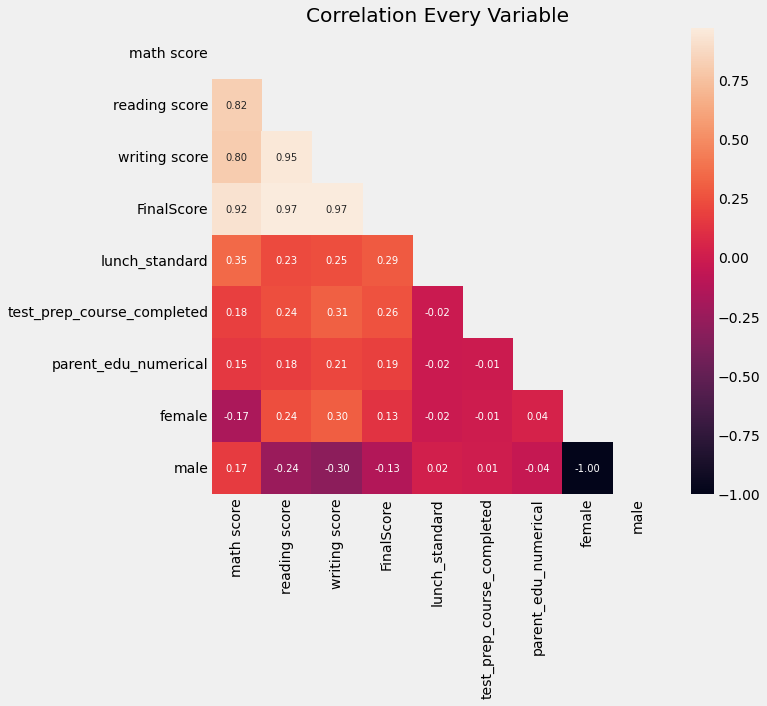

In [ ]:
student_corr = student.corr()
mask = np.zeros_like(student_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(9, 8))
ax = sns.heatmap(student_corr,mask=mask, 
                 annot=True, annot_kws={'size':10}, fmt=".2f")
plt.title("Correlation Every Variable")
plt.show()

# Modelling

In [ ]:
#Normalization
student[num] = ((student[num] - student[num].min())/(student[num].max()-student[num].min()))

In [ ]:
X = student[['female','male','parent_edu_numerical','lunch_standard','test_prep_course_completed','reading score']]
y = student['math score']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state =1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)
preds=model.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print("R_square score: ", r2_score(y_test,preds))

MAE: 0.05641919491341996
MSE: 0.005449316600838442
RMSE: 0.0738194865928939
R_square score:  0.7792744071321085


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import ensemble
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
params = {'n_estimators':300,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
gb = ensemble.GradientBoostingRegressor(**params)
gb.fit(X_train, y_train)

mse = mean_squared_error(y_test, gb.predict(X_test))

print("Gradient boosting regressor score : ", gb.score(X_test, y_test) )
print("Gradient Boosting regressor Mean squared error : " , mean_squared_error(preds, y_test))

Gradient boosting regressor score :  0.8180539434458458
Gradient Boosting regressor Mean squared error :  0.005449316600838442


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Linear regression score : ", lr.score(X_test, y_test) )
print("Linear regression Mean squared error : " , mean_squared_error(y_pred, y_test))

Linear regression score :  0.8534342412099902
Linear regression Mean squared error :  0.003618444114756146


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print("Random forest regressor score : ", rf.score(X_test, y_test) )
print("Random forest regressor Mean squared error : " , mean_squared_error(preds, y_test) )

Random forest regressor score :  0.7722990868872524
Random forest regressor Mean squared error :  0.005449316600838442


In [ ]:
ls = Lasso()
ls.fit(X_train, y_train)
y_pred = ls.predict(X_test)

print("Lasso regressor score : ", ls.score(X_test, y_test) )
print("Lasso regressor Mean squared error : " , mean_squared_error(y_pred, y_test))

Lasso regressor score :  -0.00031648145331208966
Lasso regressor Mean squared error :  0.024696008911564628


In [ ]:
rd = Ridge()
rd.fit(X_train,y_train)
y_pred = rd.predict(X_test)

print("Ridge regression score : ", rd.score(X_test, y_test) )
print("Ridge regression Mean squared error : " , mean_squared_error(y_pred, y_test))

Ridge regression score :  0.8515506345126627
Ridge regression Mean squared error :  0.003664946965249524
